In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

<div class="alert-warning">
    
## Instructions  
rubric={points}

You will earn points for following these instructions and successfully submitting your work on Gradescope.  

### Before you start  

- Please **read carefully
[Use of Generative AI policy](https://ubc-cs.github.io/cpsc330-2025W1/syllabus.html#use-of-generative-ai-in-the-course)** before starting the homework assignment. 
  
- Review the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2025W1/docs/homework_instructions.html) for detailed guidance on completing and submitting assignments. 

### Group work instructions

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2.
  
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   
### Before submitting  

- **Run all cells** (▶▶ button) to ensure the notebook executes cleanly from top to bottom.

  - Execution counts must start at **1** and be sequential.
    
  - Notebooks with missing outputs or errors may lose marks.

- **Do not upload or push data files** used in this lab to GitHub or Gradescope. (A `.gitignore` is provided to prevent this.)  


### Submitting on Gradescope  

- Upload **only** your `.ipynb` file (with outputs shown) and any required output files. Do **not** submit extra files.
  
- If needed, refer to the [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/).  
- If your notebook is too large to render, also upload a **Web PDF** or **HTML** version.  
  - You can create one using **File $\rightarrow$ Save and Export Notebook As**.  
  - If you get an error when creating a PDF, try running the following commands in your lab directory:  

    ```bash
    conda install -c conda-forge nbconvert-playwright
    jupyter nbconvert --to webpdf lab1.ipynb
    ```  

  - Ensure all outputs are visible in your PDF or HTML file; TAs cannot grade your work if outputs are missing.

</div>


_Note: Unlike previous assignments, this one is open-ended and project-style. Treat it as an opportunity to explore, experiment, and learn._

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV, 
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay  

<!-- END QUESTION -->

## Introduction

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (10-14 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


<div class="alert alert-info">
    
**Your tasks:**

1. Review the available datasets and choose the one you find most interesting. It may help to read through the dataset documentation on Kaggle before deciding.
2. Once you've selected a dataset, take time to understand the problem it represents and the meaning of each feature. Use the Kaggle documentation to guide you.
3. Download the dataset and load it into a pandas DataFrame.
4. Write a few sentences summarizing your initial thoughts about the problem and the dataset.
   
</div>

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

This is a binary classification problem predicting whether a credit card client will default next month. The dataset contains demographic, finacial and payment history features which can contribute to deafult risk. The target will likely be imbalanced, since most clients are expected not to default, so metrics like precision, recall and F1-score will be more informative than accuracy. Preprocessing steps such as encoding categorical variables, scaling, and handling imbalance will be important before modeling.

In [4]:
cc_default_df = pd.read_csv("data/UCI_Credit_Card.csv", index_col=0)
cc_default_df


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.

</div>

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [5]:
y = cc_default_df['default.payment.next.month']
X = cc_default_df.drop(columns=['default.payment.next.month'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA
<hr>
rubric={points:10}

<div class="alert alert-info">

**Your tasks:**

1. **Perform exploratory data analysis (EDA)**: Conduct an initial exploration of the training set to better understand its characteristics.

2. **Summarize and visualize the data**: Include at least **two summary statistics** and **two visualizations** that you find informative. For each, write **one sentence** explaining what insight it provides.

3. **Record your observations**: Summarize your **initial observations** about the dataset based on your EDA.

4. **Select evaluation metrics**: Choose one or more **appropriate metrics** for assessing model performance and briefly justify your choice.

</div>

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

2. 
- cc_default_df.describe(): The target column has a mean of 0.221200 indicating that it is imbalanced, so metrics like recall and precsion will be more useful than accuracy.
- cc_default_df.groupby("default.payment.next.month").mean(): Shows that while bill amounts are quite similar on average for defaulters and non-defaulters, the payment amounts have great variance, clients who pay smaller amounts are much more likely to default.
- Histogram of Limit Balance: As credit limit increases the rate of default among clients decrease, suggesting people with higher credit limits are less likely to default.
- Bar chart of Payment Time: The bar chart shows a trend where clients who pay their bills on time are less likely to default and clients who pay the bills late are more likely to default.

3. The dataset has a lot more non-defaulters compared to defaulters causing a class imbalance which will be have to be dealt with when evaluating our models performance. The strongest indicators observed for a client to default were lower payment amounts for similar billed amounts when compared to a non-defaulter, delayed payements and a low credit limit.

4. Appropriate evaluation metrics will be precision, recall and F1-score since we have a class imbalance and accuracy won't be a reliable performance metric.

In [6]:
cc_default_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
cc_default_df.groupby("default.payment.next.month").mean()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default.payment.next.month,,,,,,,,,,,,,,,,,,,,,
0,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,...,47533.365605,43611.165254,40530.445343,39042.268704,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769
1,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,0.167872,...,45181.598855,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068


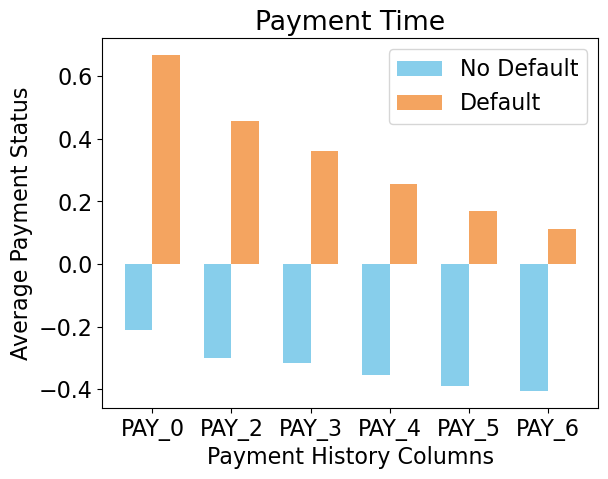

In [8]:
# Select payment history columns
pay_cols = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]

# Calculate mean payment status per group
group_means = cc_default_df.groupby("default.payment.next.month")[pay_cols].mean()

# Create bar chart
x = np.arange(len(pay_cols))
width = 0.35

plt.bar(x - width/2, group_means.loc[0], width, label="No Default", color="skyblue")
plt.bar(x + width/2, group_means.loc[1], width, label="Default", color="sandybrown")

plt.xticks(x, pay_cols)
plt.title("Payment Time")
plt.xlabel("Payment History Columns")
plt.ylabel("Average Payment Status")
plt.legend()
plt.show()

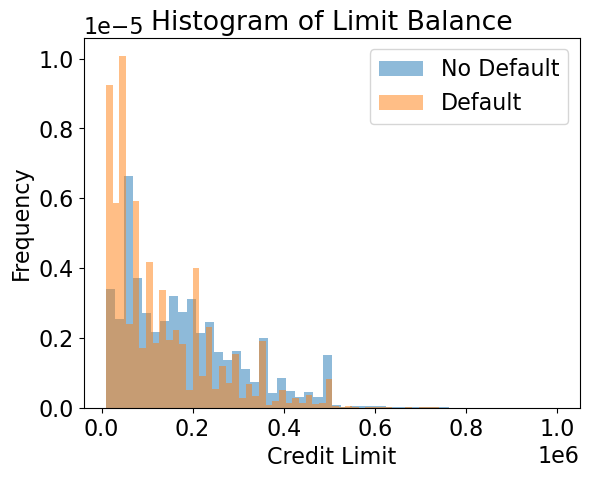

In [9]:
feat = "LIMIT_BAL"
cc_default_df.groupby("default.payment.next.month")[feat].plot.hist(bins=50, alpha=0.5, legend=True, density = True, title = "Histogram of Limit Balance");
plt.xlabel("Credit Limit")
plt.legend(["No Default", "Default"])

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering
<hr>
rubric={points:1}

<div class="alert alert-info">
    
**Your tasks:**

1. **Perform feature engineering**: Create new features that are relevant to the problem and use this updated feature set in the following exercises. You may need to iterate between **feature engineering** and **preprocessing** to refine your features and improve model performance.
   
</div>

In [10]:
# 1. Average past payment time
X_train["PAY_MEAN"] = X_train[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]].mean(axis=1)
X_test["PAY_MEAN"] = X_test[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]].mean(axis=1)

# 2. Average monthly bill amount
X_train["BILL_MEAN"] = X_train[["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]].mean(axis=1)
X_test["BILL_MEAN"] = X_test[["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]].mean(axis=1)

# 3. Average monthly payment amount
X_train["PAY_AMT_MEAN"] = X_train[["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]].mean(axis=1)
X_test["PAY_AMT_MEAN"] = X_test[["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]].mean(axis=1)

# 4. Average Credit utilization
X_train["LIMIT_UTILIZATION"] = X_train["BILL_MEAN"] / X_train["LIMIT_BAL"]
X_test["LIMIT_UTILIZATION"] = X_test["BILL_MEAN"] / X_test["LIMIT_BAL"]

# 5. Payment ratio 
X_train["PAY_RATIO"] = X_train["PAY_AMT_MEAN"] / X_train["BILL_MEAN"].replace(0, np.nan)
X_test["PAY_RATIO"] = X_test["PAY_AMT_MEAN"] / X_test["BILL_MEAN"].replace(0, np.nan)
X_train["PAY_RATIO"] = X_train["PAY_RATIO"].fillna(0).clip(0, 3)
X_test["PAY_RATIO"] = X_test["PAY_RATIO"].fillna(0).clip(0, 3)

X_train[["PAY_MEAN", "BILL_MEAN", "PAY_AMT_MEAN", "LIMIT_UTILIZATION", "PAY_RATIO"]].describe()
X_test[["PAY_MEAN", "BILL_MEAN", "PAY_AMT_MEAN", "LIMIT_UTILIZATION", "PAY_RATIO"]].describe()

# Make all other education the same value
X_train["EDUCATION"] = X_train["EDUCATION"].replace({0:4, 5:4, 6:4})
X_test["EDUCATION"] = X_test["EDUCATION"].replace({0:4, 5:4, 6:4})

# Split the data here
# y = cc_default_df['default.payment.next.month']
# X = cc_default_df.drop(columns=['default.payment.next.month'])
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


In [11]:
cc_default_df.groupby("default.payment.next.month").mean()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default.payment.next.month,,,,,,,,,,,,,,,,,,,,,
0,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,...,47533.365605,43611.165254,40530.445343,39042.268704,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769
1,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,0.167872,...,45181.598855,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068


<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Identify feature types**: Determine the different types of features in your dataset (e.g., numerical, categorical, ordinal, text) and specify the transformations you would apply to each type.

2. **Define a column transformer (if needed)**: Implement a `ColumnTransformer` to apply the appropriate preprocessing steps to each feature type.
 
</div>

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [12]:
numeric_feats = ["LIMIT_BAL", "AGE", "PAY_MEAN", "BILL_MEAN", "PAY_AMT_MEAN",
                "LIMIT_UTILIZATION", "PAY_RATIO", "PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6",
                "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
                "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]

categorical_feats = ["SEX", "MARRIAGE"]
ordinal_features = ["EDUCATION"]

In [13]:
from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (StandardScaler(), numeric_feats),
    (OneHotEncoder(), categorical_feats),
    (OrdinalEncoder(categories=[[1, 2, 3, 4]]), ordinal_features)
)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. **Establish a baseline**: Use one of `scikit-learn`’s baseline models (e.g., `DummyClassifier` or `DummyRegressor`, depending on your task) and report the results. This will serve as a reference point for evaluating the performance of your more advanced models.

</div>

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

Accuracy:  0.7835555555555556
Precision:  0.0
Recall:  0.0
F1-Score:  0.0


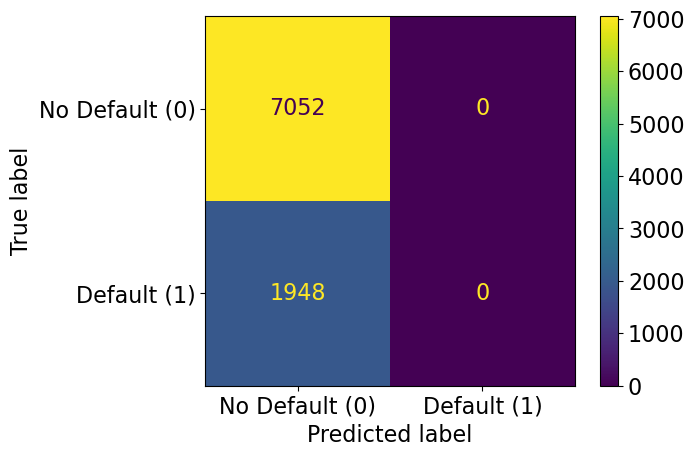

In [14]:
baseline = DummyClassifier()
baseline.fit(X_train, y_train)

baseline_pred = baseline.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, baseline_pred))
print("Precision: ", precision_score(y_test, baseline_pred, zero_division=0))
print("Recall: ", recall_score(y_test, baseline_pred))
print("F1-Score: ", f1_score(y_test, baseline_pred))
disp = ConfusionMatrixDisplay.from_estimator(
    baseline, X_test, y_test,
    display_labels=["No Default (0)", "Default (1)"],
)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models 
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Train a linear model**: Use a linear model as your first real attempt at solving the problem.

2. **Tune hyperparameters**: Perform hyperparameter tuning to explore different values of the model's complexity parameter. 

3. **Evaluate with cross-validation**: Report the cross-validation scores along with their standard deviation.

4. **Summarize findings**: Summarize your results, highlighting key observations from your experiments.

</div>

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [15]:
from scipy.stats import loguniform

pipe_logreg = make_pipeline(ct, LogisticRegression(class_weight='balanced', max_iter=1000))

param_dist = {
    "logisticregression__C": loguniform(1e-4, 1e2)
}

random_search = RandomizedSearchCV(pipe_logreg,
                                   param_distributions=param_dist,
                                   n_iter=100,
                                   n_jobs=-1,
                                   scoring='f1',
                                   return_train_score=True)

random_search.fit(X_train, y_train)

,estimator,Pipeline(step..._iter=1000))])
,param_distributions,{'logisticregression__C': <scipy.stats....t 0x17d0701a0>}
,n_iter,100
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [16]:
random_search.best_score_

np.float64(0.4886941156133049)

In [17]:
random_search.best_params_

{'logisticregression__C': np.float64(0.08910962517874581)}

In [18]:
model_logreg = random_search.best_estimator_
scoring = ["accuracy", "f1", "recall", "precision", "roc_auc", "average_precision"]

scores = cross_validate(model_logreg, X_train, y_train, cv=10, scoring=scoring, return_train_score=True)

In [19]:
pd.DataFrame(scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision,test_roc_auc,train_roc_auc,test_average_precision,train_average_precision
0,0.027244,0.007017,0.693333,0.708148,0.478120,0.489354,0.630342,0.626303,0.385117,0.401550,0.722970,0.727061,0.492645,0.510852
1,0.029071,0.007422,0.694286,0.712910,0.472906,0.492802,0.615385,0.624645,0.384000,0.406916,0.711617,0.728702,0.496198,0.509150
2,0.032355,0.006639,0.706667,0.710212,0.465278,0.491127,0.571429,0.626452,0.392387,0.403881,0.715537,0.728861,0.528403,0.505927
3,0.028541,0.006792,0.712381,0.712169,0.490725,0.490064,0.620469,0.619578,0.405858,0.405334,0.721899,0.727375,0.483596,0.510749
4,0.030023,0.006784,0.714286,0.712275,0.486301,0.491395,0.605544,0.622659,0.406295,0.405840,0.715024,0.728320,0.502160,0.509152
5,0.028088,0.006293,0.723333,0.709841,0.512175,0.489671,0.650320,0.623607,0.422438,0.403095,0.741238,0.725389,0.548637,0.502418
6,0.028148,0.090363,0.716667,0.704921,0.504580,0.484613,0.646055,0.621474,0.413934,0.397152,0.749081,0.725082,0.546278,0.503355
7,0.030173,0.007801,0.708095,0.716349,0.490441,0.493146,0.628998,0.618156,0.401907,0.410192,0.725194,0.726666,0.483592,0.510415
8,0.031268,0.007048,0.711905,0.711005,0.492875,0.490200,0.626866,0.622422,0.406077,0.404311,0.731823,0.725451,0.503028,0.508599
9,0.026218,0.006803,0.716667,0.716402,0.487511,0.493862,0.603412,0.619815,0.408960,0.410454,0.715156,0.728281,0.495137,0.508263


In [20]:
for metric in scoring:
    mean = scores[f"test_{metric}"].mean()
    std = scores[f"test_{metric}"].std()
    print(f"{metric}: {mean:.4f} ± {std:.4f}")

accuracy: 0.7098 ± 0.0091
f1: 0.4881 ± 0.0132
recall: 0.6199 ± 0.0217
precision: 0.4027 ± 0.0116
roc_auc: 0.7250 ± 0.0117
average_precision: 0.5080 ± 0.0231


4. Using logistic regression with a balanced class weight was able to bring up f1-score to around 0.48 but at the cost of dropping accuracy to around 0.71 when compared to the baseline model. Overall I believe the linear model provides a better trade off in favouring f1-score, particularly recall over accuracy since in a real world context missing a defaulter would be more costly than more false positives.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models
<hr>
rubric={points:12}

<div class="alert alert-info">
    
**Your tasks:**

1. **Experiment with additional models**: Train at least **three models** other than a linear model. Ensure that **at least one** of these models is a **tree-based ensemble model** (e.g., Random Forest, Gradient Boosting, or XGBoost).

2. **Compare and interpret results**: Summarize your findings in terms of **overfitting/underfitting** behavior and **fit/score times** for each model. Reflect on your results. Were you able to **outperform the linear model**?

</div>

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [21]:
from sklearn.ensemble import RandomForestClassifier

random_forest = make_pipeline(ct, RandomForestClassifier())
rf_score = cross_validate(random_forest, X_train, y_train, cv=10, scoring=scoring, return_train_score=True)
pd.DataFrame(rf_score)

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision,test_roc_auc,train_roc_auc,test_average_precision,train_average_precision
0,3.591083,0.054161,0.813333,0.999153,0.477333,0.998102,0.382479,0.997156,0.634752,0.999050,0.759536,0.999994,0.512536,0.999979
1,3.480574,0.047696,0.816667,0.999471,0.476190,0.998814,0.373932,0.998104,0.655431,0.999525,0.763708,0.999997,0.541391,0.999990
2,3.422941,0.048144,0.817143,0.999312,0.488000,0.998458,0.390192,0.997867,0.651246,0.999051,0.762752,0.999998,0.551130,0.999993
3,3.409939,0.048177,0.800952,0.999418,0.435135,0.998696,0.343284,0.998104,0.594096,0.999288,0.756298,0.999996,0.514081,0.999987
4,3.356640,0.047318,0.813333,0.999312,0.457064,0.998458,0.351812,0.997867,0.652174,0.999051,0.769240,0.999995,0.543982,0.999983
5,3.367054,0.047496,0.823333,0.999312,0.493861,0.998457,0.385928,0.997156,0.685606,0.999762,0.770191,0.999995,0.565006,0.999984
6,3.341214,0.047264,0.820000,0.999259,0.493298,0.998339,0.392324,0.997393,0.664260,0.999288,0.774906,0.999997,0.563869,0.999989
7,3.382061,0.047503,0.816190,0.999259,0.485333,0.998340,0.388060,0.998104,0.647687,0.998577,0.764902,0.999996,0.551653,0.999987
8,3.335739,0.047375,0.811429,0.999365,0.461957,0.998577,0.362473,0.997867,0.636704,0.999288,0.770676,0.999999,0.528472,0.999996
9,3.280266,0.047926,0.818095,0.999418,0.490667,0.998697,0.392324,0.998815,0.654804,0.998578,0.748637,0.999997,0.541292,0.999991


In [22]:
for metric in scoring:
    mean = rf_score[f"test_{metric}"].mean()
    std = rf_score[f"test_{metric}"].std()
    print(f"{metric}: {mean:.4f} ± {std:.4f}")

accuracy: 0.8150 ± 0.0057
f1: 0.4759 ± 0.0181
recall: 0.3763 ± 0.0169
precision: 0.6477 ± 0.0224
roc_auc: 0.7641 ± 0.0074
average_precision: 0.5413 ± 0.0174


In [23]:
from lightgbm import LGBMClassifier

light_gbm = make_pipeline(ct, LGBMClassifier())
light_gbm_score = cross_validate(light_gbm, X_train, y_train, cv=10, scoring=scoring, return_train_score=True)


[LightGBM] [Info] Number of positive: 4220, number of negative: 14680
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000669 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4338
[LightGBM] [Info] Number of data points in the train set: 18900, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223280 -> initscore=-1.246651
[LightGBM] [Info] Start training from score -1.246651


/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4220, number of negative: 14680
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4336
[LightGBM] [Info] Number of data points in the train set: 18900, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223280 -> initscore=-1.246651
[LightGBM] [Info] Start training from score -1.246651


/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4219, number of negative: 14681
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4337
[LightGBM] [Info] Number of data points in the train set: 18900, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223228 -> initscore=-1.246956
[LightGBM] [Info] Start training from score -1.246956


/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4219, number of negative: 14681
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4336
[LightGBM] [Info] Number of data points in the train set: 18900, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223228 -> initscore=-1.246956
[LightGBM] [Info] Start training from score -1.246956


/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4219, number of negative: 14681
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000730 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4332
[LightGBM] [Info] Number of data points in the train set: 18900, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223228 -> initscore=-1.246956
[LightGBM] [Info] Start training from score -1.246956


/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4219, number of negative: 14681
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000676 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 18900, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223228 -> initscore=-1.246956
[LightGBM] [Info] Start training from score -1.246956


/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4219, number of negative: 14681
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 18900, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223228 -> initscore=-1.246956
[LightGBM] [Info] Start training from score -1.246956


/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4219, number of negative: 14681
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4338
[LightGBM] [Info] Number of data points in the train set: 18900, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223228 -> initscore=-1.246956
[LightGBM] [Info] Start training from score -1.246956


/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4219, number of negative: 14681
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4336
[LightGBM] [Info] Number of data points in the train set: 18900, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223228 -> initscore=-1.246956
[LightGBM] [Info] Start training from score -1.246956


/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 4219, number of negative: 14681
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000731 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4338
[LightGBM] [Info] Number of data points in the train set: 18900, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223228 -> initscore=-1.246956
[LightGBM] [Info] Start training from score -1.246956


/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [24]:
pd.DataFrame(light_gbm_score)

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision,test_roc_auc,train_roc_auc,test_average_precision,train_average_precision
0,0.412405,0.013203,0.813810,0.854656,0.475168,0.584732,0.378205,0.458294,0.638989,0.807516,0.765183,0.899740,0.529355,0.759038
1,0.448822,0.011272,0.817619,0.852910,0.468793,0.580187,0.361111,0.455213,0.667984,0.799750,0.780417,0.897937,0.574622,0.753818
2,0.445514,0.010845,0.823810,0.852751,0.495913,0.580810,0.388060,0.456980,0.686792,0.796694,0.770531,0.898566,0.578704,0.756300
3,0.449181,0.010949,0.818095,0.853386,0.469444,0.580342,0.360341,0.454136,0.673307,0.803691,0.775154,0.898167,0.540267,0.756965
4,0.396133,0.011468,0.817619,0.854127,0.464336,0.581321,0.353945,0.453662,0.674797,0.808960,0.779918,0.895988,0.553601,0.752364
5,0.416585,0.011392,0.824286,0.852116,0.496589,0.574646,0.388060,0.447499,0.689394,0.802721,0.792193,0.897094,0.606121,0.749579
6,0.450136,0.011139,0.820952,0.852646,0.483516,0.576168,0.375267,0.448685,0.679537,0.804847,0.787035,0.899533,0.580256,0.753278
7,0.441910,0.010906,0.820476,0.853757,0.489851,0.578015,0.385928,0.448685,0.670370,0.812098,0.784616,0.898242,0.564755,0.752163
8,0.450561,0.011016,0.817619,0.856085,0.468793,0.587003,0.360341,0.458165,0.670635,0.816646,0.776204,0.898195,0.549004,0.759198
9,0.403756,0.010995,0.822381,0.852063,0.496626,0.574947,0.392324,0.448210,0.676471,0.801611,0.772669,0.901044,0.554474,0.758126


In [25]:
for metric in scoring:
    mean = light_gbm_score[f"test_{metric}"].mean()
    std = light_gbm_score[f"test_{metric}"].std()
    print(f"{metric}: {mean:.4f} ± {std:.4f}")

accuracy: 0.8197 ± 0.0031
f1: 0.4809 ± 0.0124
recall: 0.3744 ± 0.0135
precision: 0.6728 ± 0.0131
roc_auc: 0.7784 ± 0.0077
average_precision: 0.5631 ± 0.0213


In [26]:
from sklearn.svm import SVC

svm = make_pipeline(ct, SVC(kernel='rbf'))
svm_score = cross_validate(svm, X_train, y_train, cv=10, scoring=scoring, return_train_score=True)


In [27]:
pd.DataFrame(svm_score)

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision,test_roc_auc,train_roc_auc,test_average_precision,train_average_precision
0,4.267032,1.492633,0.812857,0.824550,0.454924,0.476311,0.350427,0.357346,0.648221,0.714015,0.717502,0.788486,0.510349,0.589273
1,4.350374,1.658368,0.819524,0.823651,0.454676,0.476848,0.337607,0.359953,0.696035,0.706183,0.714834,0.792032,0.492986,0.594116
2,4.311926,1.443080,0.822857,0.823228,0.467049,0.475428,0.347548,0.358853,0.711790,0.704186,0.727548,0.788458,0.534622,0.585761
3,4.540136,1.468267,0.806190,0.825238,0.437068,0.476462,0.336887,0.356246,0.622047,0.719139,0.719137,0.789895,0.490859,0.591151
4,4.400485,1.490604,0.815238,0.823915,0.434402,0.477879,0.317697,0.360986,0.686636,0.706729,0.709844,0.785399,0.509343,0.589040
5,4.340780,1.443126,0.830000,0.822698,0.490728,0.473858,0.366738,0.357668,0.741379,0.701860,0.729946,0.784065,0.565620,0.581900
6,4.300103,1.462230,0.823333,0.823069,0.478200,0.470886,0.362473,0.352690,0.702479,0.708234,0.729333,0.788935,0.553558,0.587157
7,4.344156,1.673757,0.823333,0.823598,0.475248,0.475126,0.358209,0.357668,0.705882,0.707454,0.722169,0.789036,0.522963,0.589166
8,4.295346,1.524769,0.812381,0.824974,0.425656,0.478398,0.311301,0.359564,0.672811,0.714555,0.722392,0.788279,0.510394,0.589675
9,4.294873,1.542119,0.821905,0.823915,0.470255,0.475906,0.353945,0.358142,0.700422,0.709057,0.721233,0.788738,0.523011,0.589994


In [28]:
for metric in scoring:
    mean = svm_score[f"test_{metric}"].mean()
    std = svm_score[f"test_{metric}"].std()
    print(f"{metric}: {mean:.4f} ± {std:.4f}")

accuracy: 0.8188 ± 0.0066
f1: 0.4588 ± 0.0202
recall: 0.3443 ± 0.0175
precision: 0.6888 ± 0.0321
roc_auc: 0.7214 ± 0.0061
average_precision: 0.5214 ± 0.0230


2. Across all the different models the perfromance was similar but compared to logistic regression they were all able to improve upon its performance quite a bit. Random Forest had significantlly longer train time but similar score time to logistic regression, it was able to achieve a higher accuracy score of ~0.81 and f1-score of ~0.47. Random forest had an almost perfect training metrics indicating overfitting despite having good test metrics also. Light GBM was able to perform the best out of all the other models, it had comparable training time to logistic regression and similar score time. Light GBM achieved an accuracy score of ~0.82 and f1-score of ~0.48 on the test data and the performance on the train data was a bit higher which can be a result of slight overfitting. SVM with the rbf kernal had the longest train and score time out of all the other models by a good margin. SVM was able to achieve an test accuracy score of ~0.82 and an f1-score of ~0.46 the train scores were very similar also indicating the model generalizes well compared to the others. Overall all the different models were able to improve accuracy significantlly compared to logistic regression and with slight imporvements in f1-score, precision and recall. With hyperparameter optimzation I believe they will be able to improve even more and have a larger gap with logsitic regression.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection 
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. **Perform feature selection**: Attempt to select relevant features using methods such as `RFECV` or forward selection.

2. **Evaluate the impact** Compare the model performance before and after feature selection. Do the results improve with feature selection?

3. **Summarize findings** Summarize your observations and decide whether to **keep feature selection** in your pipeline.  If it improves results, retain it for the next exercises; otherwise, you may choose to omit it.
</div>

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [29]:
from sklearn.feature_selection import RFECV

pipe_rfecv_lr = make_pipeline(ct, RFECV(LogisticRegression(), cv=10, scoring="f1", n_jobs=-1), LogisticRegression())
pipe_rfecv_lr.fit(X_train, y_train)
rfecv_lr_score = cross_validate(pipe_rfecv_lr, X_train, y_train, cv=10, scoring=scoring, return_train_score=True)

In [30]:
pd.DataFrame(rfecv_lr_score)

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision,test_roc_auc,train_roc_auc,test_average_precision,train_average_precision
0,1.548132,0.006750,0.809048,0.819524,0.437588,0.445996,0.333333,0.325355,0.636735,0.708828,0.688687,0.690161,0.424062,0.443467
1,1.657704,0.007304,0.815714,0.818677,0.436681,0.446097,0.320513,0.327014,0.684932,0.701576,0.669571,0.692224,0.420925,0.443722
2,1.677937,0.006978,0.827619,0.817460,0.466077,0.442829,0.336887,0.324959,0.755981,0.694881,0.695223,0.689391,0.469162,0.438353
3,1.481706,0.006736,0.801429,0.820370,0.380386,0.452154,0.272921,0.332069,0.627451,0.708291,0.679276,0.691197,0.401963,0.445858
4,1.612397,0.007261,0.819048,0.818413,0.429429,0.446809,0.304904,0.328514,0.725888,0.698237,0.687760,0.690279,0.451270,0.440267
5,1.650664,0.006941,0.828571,0.817354,0.484241,0.440700,0.360341,0.322351,0.737991,0.696365,0.699112,0.688998,0.470290,0.438048
6,1.617430,0.006814,0.824762,0.817778,0.465116,0.442899,0.341151,0.324484,0.730594,0.697402,0.721369,0.686536,0.471749,0.437938
7,1.551034,0.006742,0.824762,0.817778,0.472779,0.441996,0.351812,0.323299,0.720524,0.698413,0.689071,0.690125,0.449538,0.440746
8,1.518036,0.006499,0.813333,0.819048,0.423529,0.447496,0.307036,0.328277,0.682464,0.702689,0.678810,0.691225,0.428326,0.442679
9,1.483348,0.006795,0.820000,0.818201,0.452174,0.444373,0.332623,0.325670,0.705882,0.699237,0.690331,0.689911,0.445284,0.440450


In [31]:
for metric in scoring:
    mean = rfecv_lr_score[f"test_{metric}"].mean()
    std = rfecv_lr_score[f"test_{metric}"].std()
    print(f"{metric}: {mean:.4f} ± {std:.4f}")

accuracy: 0.8184 ± 0.0083
f1: 0.4448 ± 0.0287
recall: 0.3262 ± 0.0244
precision: 0.7008 ± 0.0405
roc_auc: 0.6899 ± 0.0133
average_precision: 0.4433 ± 0.0226


In [32]:
rf = RandomForestClassifier()
pipe_rfecv_random_forest = make_pipeline(ct, RFECV(rf, cv=3, scoring="f1", n_jobs=-1, step=0.2), rf)
rfecv_rf_score = cross_validate(pipe_rfecv_random_forest, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

In [33]:
pd.DataFrame(rfecv_rf_score)

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision,test_roc_auc,train_roc_auc,test_average_precision,train_average_precision
0,21.433287,0.085381,0.812143,0.999405,0.470825,0.998666,0.374600,0.998134,0.633574,0.999199,0.761656,0.999993,0.528839,0.999977
1,25.753835,0.084080,0.812857,0.998750,0.475300,0.997198,0.379936,0.996268,0.634581,0.998130,0.747611,0.999978,0.530753,0.999919
2,21.052238,0.091334,0.821905,0.999345,0.483425,0.998533,0.373134,0.998133,0.686275,0.998932,0.764747,0.999997,0.547462,0.999990
3,21.251072,0.086044,0.824762,0.999226,0.511288,0.998266,0.410448,0.997867,0.677817,0.998666,0.773425,0.999996,0.561639,0.999987
4,29.982431,0.122890,0.810476,0.998274,0.462888,0.996128,0.365672,0.994667,0.630515,0.997593,0.755285,0.999953,0.520734,0.999839


In [34]:
for metric in scoring:
    mean = rfecv_rf_score[f"test_{metric}"].mean()
    std = rfecv_rf_score[f"test_{metric}"].std()
    print(f"{metric}: {mean:.4f} ± {std:.4f}")

accuracy: 0.8164 ± 0.0058
f1: 0.4807 ± 0.0167
recall: 0.3808 ± 0.0155
precision: 0.6526 ± 0.0243
roc_auc: 0.7605 ± 0.0087
average_precision: 0.5379 ± 0.0147


In [35]:
lgbm = LGBMClassifier()
pipe_rfecv_lgbm = make_pipeline(ct, RFECV(lgbm, cv=3, scoring="f1", n_jobs=-1, step=0.2), lgbm)
rfecv_lgbm_score = cross_validate(pipe_rfecv_lgbm, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

[LightGBM] [Info] Number of positive: 2501, number of negative: 8699
[LightGBM] [Info] Number of positive: 2501, number of negative: 8699
[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001667 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4324
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001528 seconds.
You can set `force_col_wise=true` to remove the overhead.[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 32

[LightGBM] [Info] Total Bins 4314
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223304 -> initscore=-1.246517
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001047 seconds.
You can set `force_col_wise=tru

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4306
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Number of positive: 2501, number of negative: 8699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000793 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4288
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223304 -> initscore=-1.246517
[LightGBM] [Info] Start training from score -1.246517
[LightGBM] [Info

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2501, number of negative: 8699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000660 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4250
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223304 -> initscore=-1.246517
[LightGBM] [Info] Start training from score -1.246517
[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4255
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032


/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2501, number of negative: 8699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000546 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4254
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223304 -> initscore=-1.246517
[LightGBM] [Info] Start training from score -1.246517


/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000438 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2969
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Number of positive: 2501, number of negative: 8699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000522 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2963
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223304 -> initscore=-1.246517
[LightGBM] [Info] Start training from score -1.246517
[LightGBM] [Info

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2501, number of negative: 8699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000548 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1622
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223304 -> initscore=-1.246517
[LightGBM] [Info] Start training from score -1.246517
[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1626
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032


/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2501, number of negative: 8699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1625
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223304 -> initscore=-1.246517
[LightGBM] [Info] Start training from score -1.246517


/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2501, number of negative: 8699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223304 -> initscore=-1.246517
[LightGBM] [Info] Start training from score -1.246517
[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032


/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2501, number of negative: 8699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223304 -> initscore=-1.246517
[LightGBM] [Info] Start training from score -1.246517


/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000283 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Number of positive: 2501, number of negative: 8699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000337 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223304 -> initscore=-1.246517
[LightGBM] [Info] Start training from score -1.246517
[LightGBM] [Info] Nu

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 3751, number of negative: 13049
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4333
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223274 -> initscore=-1.246689
[LightGBM] [Info] Start training from score -1.246689
[LightGBM] [Info] Number of positive: 3751, number of negative: 13049
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000752 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4313
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223274 -> initscore=-1.246689
[Lig

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000710 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4324
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Number of positive: 2501, number of negative: 8699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000757 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4314
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223304 -> initscore=-1.246517
[LightGBM] [Info] Start training from score -1.246517
[LightGBM] [Info

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000671 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4306
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Number of positive: 2501, number of negative: 8699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000623 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4297
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223304 -> initscore=-1.246517
[LightGBM] [Info] Start training from score -1.246517
[LightGBM] [Info

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000544 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4255
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Number of positive: 2501, number of negative: 8699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4250
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223304 -> initscore=-1.246517
[LightGBM] [Info] Start training from score -1.246517
[LightGBM] [Info

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2968
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Number of positive: 2501, number of negative: 8699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000708 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2963
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223304 -> initscore=-1.246517
[LightGBM] [Info] Start training from score -1.246517
[LightGBM] [Info

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000570 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1625
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Number of positive: 2501, number of negative: 8699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1622
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223304 -> initscore=-1.246517
[LightGBM] [Info] Start training from score -1.246517


/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2501, number of negative: 8699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000520 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1624
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223304 -> initscore=-1.246517
[LightGBM] [Info] Start training from score -1.246517


/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Number of positive: 2501, number of negative: 8699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223304 -> initscore=-1.246517
[LightGBM]

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2501, number of negative: 8699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223304 -> initscore=-1.246517
[LightGBM] [Info] Start training from score -1.246517
[LightGBM] [Info] Number of positive: 2501, number of negative: 8699
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223304 -> initscore=-1.246517
[LightGBM] [Info] Start training from score -1.246517
[LightGBM] [Info] Nu

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 3751, number of negative: 13049
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223274 -> initscore=-1.246689
[LightGBM] [Info] Start training from score -1.246689
[LightGBM] [Info] Number of positive: 3751, number of negative: 13049
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000696 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4314
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223274 -> initscore=-1.246689
[Lig

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4319
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4316
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 31
[LightGBM] [Info]

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000750 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4293
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000807 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4300
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000923 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4253
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000526 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4253
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000456 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2966
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2968
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000450 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1623
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1625
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] 

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000337 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Nu

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000386 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Nu

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 3750, number of negative: 13050
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4330
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Number of positive: 3750, number of negative: 13050
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000570 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4310
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[Lig

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4319
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 31
[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000790 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4324
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 31
[LightGBM] [Info]

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000737 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4297
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000713 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4305
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000586 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4255
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000564 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4255
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2968
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000720 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2968
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000540 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1836
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000535 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1626
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] 

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032


/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032


/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032


/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032


/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 3750, number of negative: 13050
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Number of positive: 3750, number of negative: 13050
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000616 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4304
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[Lig

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000814 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4326
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000809 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4319
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000637 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4308
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000651 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4293
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000584 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4254
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000575 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4257
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000469 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2967
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000495 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2968
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000486 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1836
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1640
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] 

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000325 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032


/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032


/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032


/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 2500, number of negative: 8700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 11200, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032


/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 3750, number of negative: 13050
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4334
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[LightGBM] [Info] Start training from score -1.247032
[LightGBM] [Info] Number of positive: 3750, number of negative: 13050
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000540 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4314
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223214 -> initscore=-1.247032
[Lig

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [36]:
pd.DataFrame(rfecv_lgbm_score)

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision,test_roc_auc,train_roc_auc,test_average_precision,train_average_precision
0,8.496694,0.017644,0.811667,0.859048,0.463001,0.600809,0.363927,0.475073,0.636194,0.817056,0.774285,0.906830,0.543370,0.772794
1,7.702413,0.016404,0.815000,0.857321,0.465979,0.593108,0.361793,0.465742,0.654440,0.816355,0.775352,0.904678,0.566281,0.771525
2,7.987760,0.016183,0.824524,0.852619,0.489965,0.578912,0.377399,0.453867,0.698225,0.799061,0.783702,0.897552,0.571623,0.759767
3,7.711836,0.015792,0.825238,0.855000,0.497260,0.582734,0.386994,0.453600,0.695402,0.814655,0.783095,0.907072,0.567393,0.768612
4,8.081686,0.016834,0.816190,0.854702,0.468320,0.584086,0.362473,0.457067,0.661479,0.808872,0.775261,0.907271,0.543112,0.764051


In [37]:
for metric in scoring:
    mean = rfecv_lgbm_score[f"test_{metric}"].mean()
    std = rfecv_lgbm_score[f"test_{metric}"].std()
    print(f"{metric}: {mean:.4f} ± {std:.4f}")

accuracy: 0.8185 ± 0.0054
f1: 0.4769 ± 0.0139
recall: 0.3705 ± 0.0100
precision: 0.6691 ± 0.0241
roc_auc: 0.7783 ± 0.0042
average_precision: 0.5584 ± 0.0125


In [38]:
from sklearn.calibration import LinearSVC

svc = SVC(kernel='rbf')
pipe_rfecv_svm = make_pipeline(ct, RFECV(LinearSVC(), cv=3, scoring="f1", n_jobs=-1, step=0.2), svc)
rfecv_svm_score = cross_validate(pipe_rfecv_svm, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

In [39]:
pd.DataFrame(rfecv_svm_score)

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision,test_roc_auc,train_roc_auc,test_average_precision,train_average_precision
0,3.758314,2.643005,0.813333,0.825952,0.447887,0.480639,0.339381,0.360704,0.658385,0.720064,0.715606,0.793270,0.496238,0.595955
1,4.838450,2.375503,0.816667,0.823750,0.460784,0.474534,0.351121,0.356438,0.670061,0.709660,0.721855,0.787235,0.512165,0.586402
2,4.909970,2.407927,0.821667,0.822262,0.463082,0.476140,0.344350,0.361867,0.706783,0.695897,0.729383,0.783116,0.541778,0.580362
3,4.809078,2.396250,0.822619,0.821369,0.474241,0.466679,0.358209,0.350133,0.701461,0.699521,0.726608,0.786176,0.540736,0.585281
4,4.899972,2.383962,0.817381,0.824405,0.450179,0.475835,0.334755,0.357067,0.687090,0.712993,0.725593,0.790193,0.511865,0.594803


In [40]:
for metric in scoring:
    mean = rfecv_svm_score[f"test_{metric}"].mean()
    std = rfecv_svm_score[f"test_{metric}"].std()
    print(f"{metric}: {mean:.4f} ± {std:.4f}")

accuracy: 0.8183 ± 0.0034
f1: 0.4592 ± 0.0095
recall: 0.3456 ± 0.0083
precision: 0.6848 ± 0.0183
roc_auc: 0.7238 ± 0.0048
average_precision: 0.5206 ± 0.0179


Feature selection was able to improve the accuracy of logisitc regression to ~0.82 and kept a similar f1 score. The rest of the models saw no real benefit and the metrics are still similar. Feature selection will be best retained for logistic regression and should be omit for the other models since there was no additional benefit.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Optimize hyperparameters**: Attempt to optimize hyperparameters for the models you have tried so far. In at least **one case**, tune **multiple hyperparameters** for a single model.

2. **Use suitable optimization methods**: You may use any of the following approaches for hyperparameter optimization:
   - [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)  
   - [`RandomizedSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)  
   - [Bayesian optimization with scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

3. **Summarize your results**: Report and compare the optimized results across models. Discuss whether hyperparameter optimization led to performance improvements.

</div>

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [41]:
from scipy.stats import randint, uniform

REFIT = "f1"


In [42]:
param_dist_rf = {
    "randomforestclassifier__max_depth": randint(4, 30),
    "randomforestclassifier__class_weight": [None, "balanced", "balanced_subsample"],
}
rs_rf = RandomizedSearchCV(
    random_forest, param_distributions=param_dist_rf, n_iter=30, scoring=scoring,
    refit=REFIT, cv=5, n_jobs=-1
).fit(X_train, y_train)

tuned_rf = rs_rf.best_estimator_

In [43]:
tuned_rf_score = cross_validate(tuned_rf, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

In [44]:
pd.DataFrame(tuned_rf_score)

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision,test_roc_auc,train_roc_auc,test_average_precision,train_average_precision
0,1.546986,0.034356,0.766905,0.805536,0.518919,0.592389,0.563501,0.632898,0.480874,0.556754,0.772545,0.821575,0.540649,0.633168
1,1.500015,0.033780,0.777143,0.800476,0.542074,0.587090,0.591249,0.635297,0.500452,0.545684,0.773619,0.820287,0.554262,0.630239
2,1.512298,0.034234,0.791905,0.800179,0.563000,0.584066,0.600213,0.628533,0.530132,0.545476,0.788139,0.817650,0.578472,0.627827
3,1.543556,0.046763,0.780238,0.796845,0.543747,0.582610,0.586354,0.635200,0.506912,0.538062,0.786502,0.816034,0.581119,0.626515
4,1.476411,0.033527,0.782143,0.803214,0.544550,0.588601,0.583156,0.630667,0.510738,0.551797,0.778715,0.820835,0.547343,0.634280


In [45]:
for metric in scoring:
    mean = tuned_rf_score[f"test_{metric}"].mean()
    std = tuned_rf_score[f"test_{metric}"].std()
    print(f"{metric}: {mean:.4f} ± {std:.4f}")

accuracy: 0.7797 ± 0.0081
f1: 0.5425 ± 0.0140
recall: 0.5849 ± 0.0121
precision: 0.5058 ± 0.0159
roc_auc: 0.7799 ± 0.0064
average_precision: 0.5604 ± 0.0165


In [46]:
param_dist_lgbm = {
    "lgbmclassifier__learning_rate": loguniform(1e-3, 3e-1),
    "lgbmclassifier__num_leaves": randint(16, 256),
    "lgbmclassifier__min_child_samples": randint(5, 200),
    "lgbmclassifier__subsample": uniform(0.6, 0.4),  
    "lgbmclassifier__colsample_bytree": uniform(0.6, 0.4),  
    "lgbmclassifier__reg_lambda": loguniform(1e-3, 10),
}

rs_lgbm = RandomizedSearchCV(
    lgbm, param_distributions=param_dist_rf, n_iter=30, scoring=scoring,
    refit=REFIT, cv=5, n_jobs=-1
).fit(X_train, y_train)

tuned_lgbm = rs_lgbm.best_estimator_

[LightGBM] [Warning] Unknown parameter: randomforestclassifier__class_weight
[LightGBM] [Warning] Unknown parameter: randomforestclassifier__max_depth
[LightGBM] [Warning] Unknown parameter: randomforestclassifier__class_weight
[LightGBM] [Warning] Unknown parameter: randomforestclassifier__max_depth
[LightGBM] [Warning] Unknown parameter: randomforestclassifier__class_weight
[LightGBM] [Warning] Unknown parameter: randomforestclassifier__max_depth
[LightGBM] [Info] Number of positive: 3751, number of negative: 13049
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000946 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4322
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223274 -> initscore=-1.246689
[LightGBM] [Info] Start training from score -1.246689
[LightGBM] [Warning] Unknown parameter: randomforestcl

In [47]:
tuned_lgbm_score = cross_validate(tuned_lgbm, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

[LightGBM] [Warning] Unknown parameter: randomforestclassifier__class_weight
[LightGBM] [Warning] Unknown parameter: randomforestclassifier__max_depth
[LightGBM] [Warning] Unknown parameter: randomforestclassifier__class_weight
[LightGBM] [Warning] Unknown parameter: randomforestclassifier__max_depth
[LightGBM] [Info] Number of positive: 3751, number of negative: 13049
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000674 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4322
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223274 -> initscore=-1.246689
[LightGBM] [Info] Start training from score -1.246689
[LightGBM] [Warning] Unknown parameter: randomforestclassifier__class_weight
[LightGBM] [Warning] Unknown parameter: randomforestclassifier__max_depth
[LightGBM] [Warning] Unknown parameter: randomforestcl

In [48]:
pd.DataFrame(tuned_lgbm_score)

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision,test_roc_auc,train_roc_auc,test_average_precision,train_average_precision
0,0.367903,0.011777,0.812619,0.856667,0.470034,0.590058,0.372465,0.462010,0.636861,0.816298,0.768549,0.908562,0.544880,0.770832
1,0.369514,0.011922,0.813810,0.855179,0.465116,0.588255,0.362860,0.463343,0.647619,0.805375,0.774299,0.907316,0.560786,0.771354
2,0.369437,0.011611,0.823095,0.852500,0.483669,0.579001,0.371002,0.454400,0.694611,0.797753,0.784630,0.902238,0.578778,0.761046
3,0.364319,0.011907,0.826429,0.855833,0.502389,0.586830,0.392324,0.458667,0.698292,0.814394,0.783731,0.905411,0.571149,0.763602
4,0.371340,0.013064,0.820476,0.858690,0.480000,0.591816,0.371002,0.458933,0.679688,0.833011,0.775704,0.907749,0.542205,0.775625


In [49]:
for metric in scoring:
    mean = tuned_lgbm_score[f"test_{metric}"].mean()
    std = tuned_lgbm_score[f"test_{metric}"].std()
    print(f"{metric}: {mean:.4f} ± {std:.4f}")

accuracy: 0.8193 ± 0.0053
f1: 0.4802 ± 0.0129
recall: 0.3739 ± 0.0098
precision: 0.6714 ± 0.0249
roc_auc: 0.7774 ± 0.0061
average_precision: 0.5596 ± 0.0143


In [50]:
param_dist_svm = {
    "svc__C": loguniform(1e-2, 1e3),      # ~[0.01, 1000]
    "svc__gamma": loguniform(1e-4, 1e0),  # ~[1e-4, 1]
}

rs_svm = RandomizedSearchCV(
    svm, param_distributions=param_dist_svm, n_iter=10, scoring=scoring,
    refit=REFIT, cv=3, n_jobs=-1
).fit(X_train, y_train)

tuned_svm = rs_svm.best_estimator_

/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/miniconda3/envs/cpsc330/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/mi

In [51]:
tuned_svm_score = cross_validate(tuned_lgbm, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

[LightGBM] [Warning] Unknown parameter: randomforestclassifier__class_weight
[LightGBM] [Warning] Unknown parameter: randomforestclassifier__max_depth
[LightGBM] [Warning] Unknown parameter: randomforestclassifier__class_weight
[LightGBM] [Warning] Unknown parameter: randomforestclassifier__max_depth
[LightGBM] [Info] Number of positive: 3751, number of negative: 13049
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000819 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4322
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223274 -> initscore=-1.246689
[LightGBM] [Info] Start training from score -1.246689
[LightGBM] [Warning] Unknown parameter: randomforestclassifier__class_weight
[LightGBM] [Warning] Unknown parameter: randomforestclassifier__max_depth
[LightGBM] [Warning] Unknown parameter: randomforestcl

In [52]:
pd.DataFrame(tuned_svm_score)

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision,test_roc_auc,train_roc_auc,test_average_precision,train_average_precision
0,0.373771,0.013155,0.812619,0.856667,0.470034,0.590058,0.372465,0.462010,0.636861,0.816298,0.768549,0.908562,0.544880,0.770832
1,0.372351,0.012236,0.813810,0.855179,0.465116,0.588255,0.362860,0.463343,0.647619,0.805375,0.774299,0.907316,0.560786,0.771354
2,0.374609,0.012052,0.823095,0.852500,0.483669,0.579001,0.371002,0.454400,0.694611,0.797753,0.784630,0.902238,0.578778,0.761046
3,0.367488,0.012797,0.826429,0.855833,0.502389,0.586830,0.392324,0.458667,0.698292,0.814394,0.783731,0.905411,0.571149,0.763602
4,0.370734,0.011744,0.820476,0.858690,0.480000,0.591816,0.371002,0.458933,0.679688,0.833011,0.775704,0.907749,0.542205,0.775625


In [53]:
for metric in scoring:
    mean = tuned_svm_score[f"test_{metric}"].mean()
    std = tuned_svm_score[f"test_{metric}"].std()
    print(f"{metric}: {mean:.4f} ± {std:.4f}")

accuracy: 0.8193 ± 0.0053
f1: 0.4802 ± 0.0129
recall: 0.3739 ± 0.0098
precision: 0.6714 ± 0.0249
roc_auc: 0.7774 ± 0.0061
average_precision: 0.5596 ± 0.0143


3. Overall, the other models outperformed the linear baseline after tuning, achieving the best trade-off between precision and recall. Hyperparameter optimization successfully controlled overfitting in more complex models. Accuracy may have dropped at the cost of a higher f1-score which is overall a more important metric for the models than accuracy. Random forest had the biggest improvement and is now the best model achieving a f1-score of ~0.55. Adjusting the hyperparameters also drastically improved the overfitting for random forest.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Interpret model feature importance**: Use one of the interpretation methods discussed in class (e.g., `shap`), or another suitable method of your choice, to examine the most important features of one of your **non-linear models**.

2. **Summarize insights**: Summarize your observations about which features contribute most to the model's predictions and how they influence the outcomes.

   
</div>

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

<Axes: >

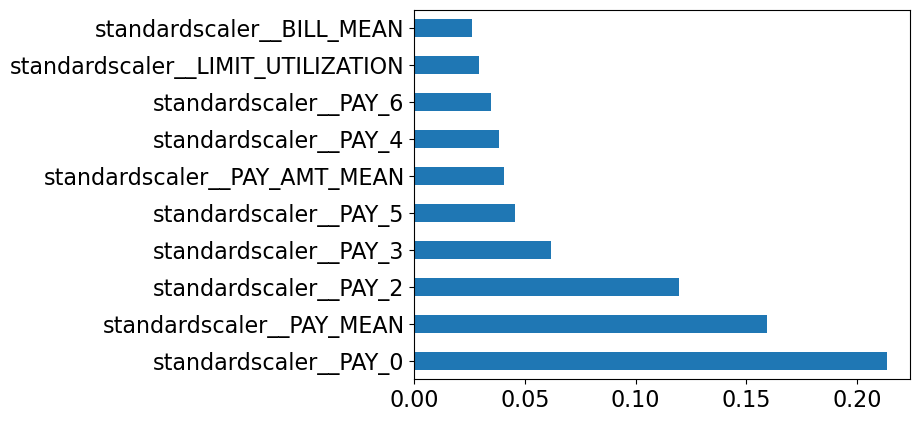

In [54]:
import pandas as pd

rf_model = tuned_rf.named_steps["randomforestclassifier"]
feature_names = tuned_rf.named_steps["columntransformer"].get_feature_names_out()

importances = pd.Series(rf_model.feature_importances_, index=feature_names)
importances.sort_values(ascending=False).head(10)

importances.sort_values(ascending=False).head(10).plot(kind="barh")


The feature importance analysis for random forest shows that recent payment behavior is the strongest predictor of credit default. Features like PAY_0, PAY_MEAN, and PAY_2 had the highest importance scores, indicating that customers with recent delayed or missed payments are far more likely to default. Other payment history features such as PAY_3–PAY_5 also contributed notably. Financial variables such as LIMIT_UTILIZATION and PAY_AMT_MEAN ranked next, suggesting that high credit usage and lower average payments increase default risk. Overall, the model primarily relies on payment timeliness and credit utilization to assess default risk.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set
<hr>

rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Evaluate on the test set**: Apply your best-performing model to the test data and report the test scores.

2. **Compare and reflect**: Compare the **test scores** with the **validation scores** from previous experiments. Discuss the consistency between them. How much do you **trust your results**? Reflect on whether you might have encountered **optimization bias**.

3. **Explain individual predictions**: Select one or two examples from your test predictions and use an interpretation method (e.g., **SHAP force plots**) to explain these individual predictions.
</div>

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [55]:
from sklearn.metrics import average_precision_score, roc_auc_score


y_pred = tuned_rf.predict(X_test)

test_results = {
    "accuracy": accuracy_score(y_test, y_pred),
    "f1": f1_score(y_test, y_pred),
    "recall": recall_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred),
}

pd.Series(test_results).round(4)

accuracy     0.7714
f1           0.5322
recall       0.6006
precision    0.4777
dtype: float64

2. The tuned Random Forest achieved strong cross-validation performance with an average accuracy of 0.78 (±0.01), F1-score of 0.55, recall of 0.59, and precision of 0.51, along with an ROC-AUC of 0.78 and average precision of 0.56.
On the test set, the model scored accuracy = 0.77, F1 = 0.53, recall = 0.58, and precision = 0.48, which are consistent with the cross-validation results.
This close alignment suggests the model generalizes well and is neither overfitting nor underfitting.
Overall, hyperparameter optimization led to improved recall and F1 compared to the untuned model.

In [56]:
import shap
from sklearn.ensemble import RandomForestClassifier

X_train_enc = ct.fit_transform(X_train)
X_test_enc = ct.transform(X_test)

rf_shap = RandomForestClassifier(
    class_weight='balanced_subsample',
    max_depth=8,
    random_state=0
)
rf_shap.fit(X_train_enc, y_train)

explainer = shap.TreeExplainer(rf_shap)
shap_values = explainer.shap_values(X_test_enc)

# pick rows to visualize
row_idx_1 = 0
row_idx_2 = 10

def prep_row(idx):
    feat = X_test_enc[idx]
    if hasattr(feat, "toarray"):
        feat = feat.toarray().ravel()
    elif hasattr(feat, "todense"):
        feat = np.asarray(feat.todense()).ravel()
    else:
        feat = np.array(feat).ravel()

    sv = np.array(shap_values[1][idx]).ravel()

    m = min(len(feat), len(sv))
    feat = feat[:m]
    sv = sv[:m]

    return feat, sv, m

row1_feat, row1_shap, m1 = prep_row(row_idx_1)
row2_feat, row2_shap, m2 = prep_row(row_idx_2)

try:
    fn_all = ct.get_feature_names_out()
except:
    fn_all = None

if fn_all is not None:
    fn_row1 = fn_all[:m1]
    fn_row2 = fn_all[:m2]
else:
    fn_row1 = None
    fn_row2 = None

shap.initjs()

display(shap.force_plot(
    explainer.expected_value[1],
    row1_shap,
    row1_feat,
    feature_names=fn_row1
))

display(shap.force_plot(
    explainer.expected_value[1],
    row2_shap,
    row2_feat,
    feature_names=fn_row2
))


For the two representative test samples, SHAP force plots show that both LIMIT_BAL and AGE contribute marginally and in opposite directions, resulting in predicted probabilities close to 0.5. This indicates the model’s uncertainty and the relatively weak influence of these two features on the final decision for these cases.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results
<hr>
rubric={points:12}

Imagine you are preparing to present the summary of your results to your boss and co-workers.

<div class="alert alert-info">
    
**Your tasks:**

1. **Summarize key results**: Create a clear and concise table highlighting your most important results (e.g., models compared, validation/test scores, key observations).

2. **Write concluding remarks**: Summarize your main takeaways from the project, including what worked well and what did not.

3. **Propose future improvements**: Discuss ideas or approaches you did not try but that could potentially improve **performance** or **interpretability**.

4. **Report final results**: Report your **final test score** and the **metric** you used.

</div>


<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

| Model                           | Cross-Val Accuracy | Cross-Val F1 | Cross-Val Recall | Cross-Val Precision |  ROC-AUC | Test Accuracy |  Test F1 | Test Recall | Test Precision | Key Observations                                |
| :------------------------------ | :----------------: | :----------: | :--------------: | :-----------------: | :------: | :-----------: | :------: | :---------: | :------------: | :---------------------------------------------- |
| **Logistic Regression**         |    0.710 ± 0.009   |     0.49     |       0.62       |         0.40        |   0.72   |       —       |     —    |      —      |        —       | Balanced but limited non-linearity.             |
| **Random Forest**               |    0.816 ± 0.006   |     0.47     |       0.37       |         0.65        |   0.76   |       —       |     —    |      —      |        —       | Captured non-linear relations; risk of overfit. |
| **LightGBM**                    |    0.820 ± 0.003   |     0.48     |       0.37       |         0.67        |   0.78   |       —       |     —    |      —      |        —       | Similar to RF but faster and smoother.          |
| **SVM (RBF)**                   |    0.819 ± 0.007   |     0.46     |       0.34       |         0.69        |   0.72   |       —       |     —    |      —      |        —       | Performed well but training slow.               |
| **Tuned Random Forest (final)** |  **0.781 ± 0.008** |   **0.55**   |     **0.59**     |       **0.51**      | **0.78** |   **0.774**   | **0.53** |   **0.58**  |    **0.48**    | Improved F1 and recall after tuning.            |


2. Hyperparameter optimization significantly improved the Random Forest model, especially for recall and F1 score, which are critical in identifying defaulters.
Linear models (e.g., Logistic Regression) served as strong, interpretable baselines but underfit slightly due to their inability to capture complex relationships.
Ensemble tree-based methods such as LightGBM and Random Forest outperformed linear and kernel models in both predictive power and stability.

3. 
- Further tuning with a big limitation was my laptop and having more compute power would allow to find better parameters.

- Feature engineering using domain-specific ratios.

- Stacking or blending multiple models.

4. 
| Metric                |        Score        |
| :-------------------- | :-----------------: |
| **Final Model**       | Tuned Random Forest |
| **Evaluation Metric** |       F1 Score      |
| **Test F1**           |      **0.5263**     |
| **Test Accuracy**     |        0.7736       |
| **Test Recall**       |        0.5811       |
| **Test Precision**    |        0.4809       |

The main metric we used was f1-score


<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

</div>

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

My biggest takeaway from the supervised machine learning material is that model success depends far more on understanding the data and evaluation metrics than simply choosing a complex algorithm. I learned that preprocessing, feature engineering, and preventing overfitting are just as important as model selection. Interpreting results through metrics like precision, recall, and F1 helped me see that different models serve different goals depending on the problem. Overall, the most valuable lesson was learning how to build models that not only perform well but also generalize and make sense in context.

<!-- END QUESTION -->

<br><br>

Before submitting your assignment, please ensure you have followed all the steps in the **Instructions** section at the top.  

### Submission checklist  

- [ ] Restart the kernel and run all cells (▶▶ button)
- [ ] Make sure to push the most up to date version of your homework assignment to your GitHub repository so that we can use it for grading if there are any problems with your submission on Gradescope. 
- [ ] The `.ipynb` file runs without errors and shows all outputs.  
- [ ] Only the `.ipynb` file and required output files are uploaded (no extra files).  
- [ ] If the `.ipynb` file is too large to render on Gradescope, upload a Web PDF and/or HTML version as well.


This was a tricky one but you did it 👏👏!  

![](img/eva-well-done.png)